# Price Forecasting: Time Series Analysis and Model Training


### 1. Problem Statement
The energy industry is undergoing a transformative journey, marked by rapid modernization and technological advancements. Infrastructure upgrades, integration of intermittent renewable energy sources, and evolving consumer demands are reshaping the sector. However, this progress comes with its challenges. Supply, demand, and prices are increasingly volatile, rendering the future less predictable. Moreover, the industry's traditional business models are being fundamentally challenged. In this competitive and dynamic landscape, accurate decision-making is pivotal. The industry relies heavily on probabilistic forecasts to navigate this uncertain future, making innovative and precise forecasting methods essential that aids stakeholders in making strategic decisions amidst the shifting energy landscape. 

### 2. Data Ingestion

#### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib,Scipy and Seaborn

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

#### 2.2 Import the CSV Data as Pandas DataFrame

In [5]:
df_price = pd.read_csv('../dataset/Price forecasting/Price Forecasting data upto December 24.csv', sep=',')

### 3. Data Preprocessing

#### 3.1 Show top 5 records


In [6]:
df_price.head()

,Delivery Day,Hours,Prices\n(EUR/MWh)
0,1/1/2020,H1,26.38
1,1/1/2020,H2,26.50
2,1/1/2020,H3,27.01
3,1/1/2020,H4,27.40
4,1/1/2020,H5,27.99


#### 3.2 Shape of Dataset


In [7]:
df_price.shape

(35352, 3)

#### 3.3 Dataset Information
<li>Delivery Day: Represents date</li>
<li>Hours: Represents Specific Hour of Day</li>
<li>Prices\n(Eur/MWh): Represents price of electricity in Euro per megawatt of electricity</li>

#### 3.4 Descriptive Statistics

In [8]:
df_price.describe()

,Prices\n(EUR/MWh)
count,34896.000000
mean,132.958000
std,120.249844
min,-35.000000
25%,47.987500
50%,95.440000
75%,179.237500
max,1047.100000


#### 3.5 Dealing with missing values


Checking NaN values

In [9]:
df_price.isna().sum()

Delivery Day         456
Hours                456
Prices\n(EUR/MWh)    456
dtype: int64

Dropping rows having values NaN

In [10]:
df_price.dropna(how='all', inplace=True)
df_price.isna().sum()

Delivery Day         0
Hours                0
Prices\n(EUR/MWh)    0
dtype: int64

#### 3.6 Dealing with Inconsistent Datas

<p>From descriptive statistics analysis, minimum value of price is found to be negative which concludes there are some negative values of price which makes no sense.</p>

<li>Checking For Negative or Zero Prices</li>

In [11]:
df_price[df_price['Prices\n(EUR/MWh)']<=0]

,Delivery Day,Hours,Prices\n(EUR/MWh)
1229,2/21/2020,H6,0.00
1230,2/21/2020,H7,0.00
1231,2/21/2020,H8,0.00
1232,2/21/2020,H9,0.00
1233,2/21/2020,H10,-5.00
...,...,...,...
34453,12/6/2023,H14,-21.44
34454,12/6/2023,H15,-22.58
34455,12/6/2023,H16,-18.47
34456,12/6/2023,H17,-5.72


<li>Replacing Negative or Zero Prices with NaN</li>

In [12]:
mask = df_price['Prices\n(EUR/MWh)'] <= 0
df_price.loc[mask, 'Prices\n(EUR/MWh)'] = np.nan

<li>Using linear interpolation to fill NaN Values</li>

In [13]:
df_price['Prices\n(EUR/MWh)'].interpolate(inplace=True)

#### 3.7 Removing Outliers

In [14]:
zscore = scipy.stats.zscore(df_price['Prices\n(EUR/MWh)'])
df_price = df_price[abs(zscore)<5]

### 4. Data Preprocessing and Data Visualization

#### 4.1 Datetime Parsing

<li>Merging Delivery day and Hours columns as Datetime to create date time object</li>

In [15]:
timeMap = {
    f'H{i+1}': f'{i:02d}' for i in range(0, 24)
}

In [16]:
df_price.loc[:, "Time"] = df_price["Hours"].apply(lambda x: timeMap[x] + ":00:00")

In [17]:
df_price.loc[:, 'Datetime'] = df_price['Delivery Day'] + ' ' + df_price['Time']

<li>Changing data type of Datetime values to Timestamp</li>

In [18]:
df_price.loc[:, 'Datetime'] = pd.to_datetime(df_price['Datetime'])

<li>Making Datetime Column as index</li>

In [19]:
df_price.set_index('Datetime', inplace=True)

<li>Dropping Time Column</li>

In [20]:
df_price.drop('Time', axis=1, inplace=True)

In [21]:
df_price

,Delivery Day,Hours,Prices\n(EUR/MWh)
Datetime,,,
2020-01-01 00:00:00,1/1/2020,H1,26.38
2020-01-01 01:00:00,1/1/2020,H2,26.50
2020-01-01 02:00:00,1/1/2020,H3,27.01
2020-01-01 03:00:00,1/1/2020,H4,27.40
2020-01-01 04:00:00,1/1/2020,H5,27.99
...,...,...,...
2023-12-24 19:00:00,12/24/2023,H20,71.09
2023-12-24 20:00:00,12/24/2023,H21,62.01
2023-12-24 21:00:00,12/24/2023,H22,53.41


#### 4.2 Visualizing Datas

<li>Time Series analysis of Daily Price</li>

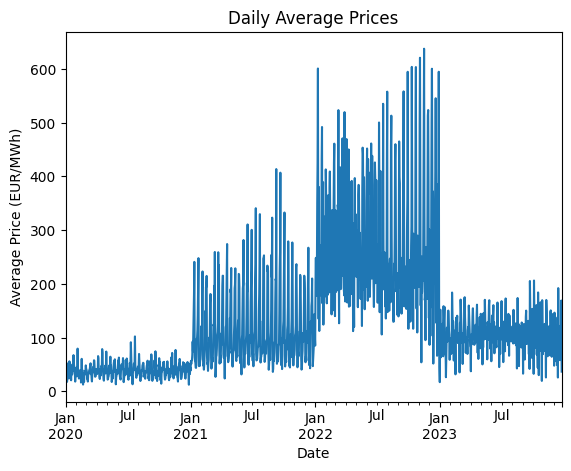

In [22]:
df_price['Prices\n(EUR/MWh)'].resample('D').mean().plot()
plt.xlabel('Date')
plt.ylabel('Average Price (EUR/MWh)')
plt.title('Daily Average Prices')
plt.show()

<li>Time Series Analysis of Weekly Price</li>

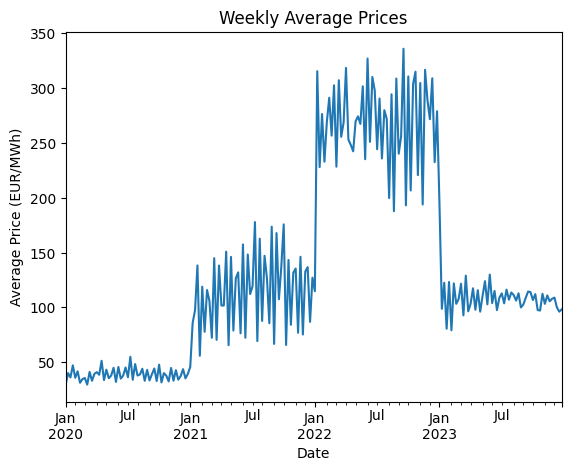

In [23]:
df_price['Prices\n(EUR/MWh)'].resample('W').mean().plot()
plt.xlabel('Date')
plt.ylabel('Average Price (EUR/MWh)')
plt.title('Weekly Average Prices')
plt.show()

<li>Time Series Analysis of Monthly Price</li>

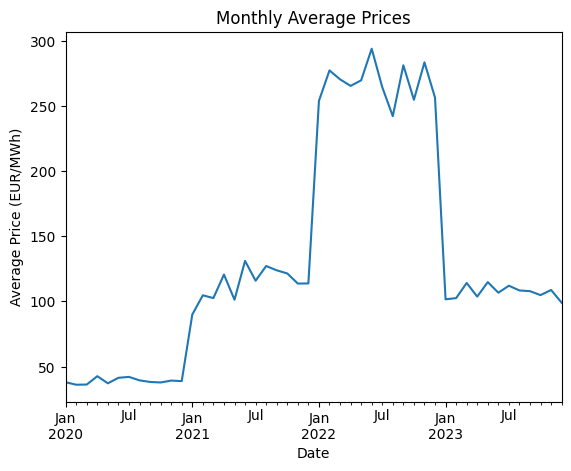

In [24]:
df_price['Prices\n(EUR/MWh)'].resample('M').mean().plot()
plt.xlabel('Date')
plt.ylabel('Average Price (EUR/MWh)')
plt.title('Monthly Average Prices')
plt.show()


<li>Average Prices of electricity for each hour of day</li>

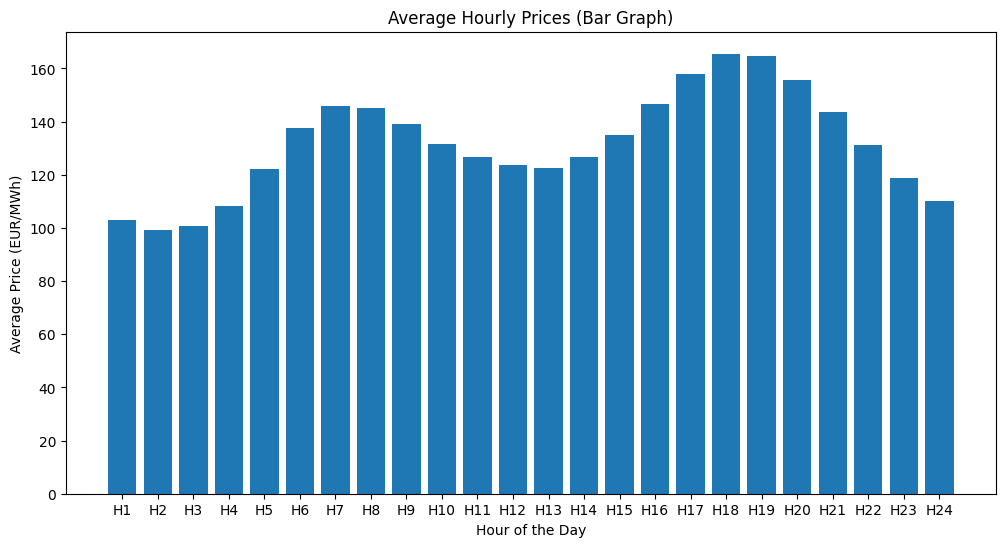

In [25]:
hour_order = [f'H{i}' for i in range(1, 25)] 

# Group by the 'Hours' column and calculate the mean for each group
hourly_average = df_price.groupby('Hours')['Prices\n(EUR/MWh)'].mean()

plt.figure(figsize=(12, 6))

# Plot a bar graph
plt.bar(hour_order, hourly_average.reindex(hour_order))
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price (EUR/MWh)')
plt.title('Average Hourly Prices (Bar Graph)')
plt.show()

4.3 Normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()
df_price = scaler.fit_transform(df_price["Prices\n(EUR/MWh)"].values.reshape(-1,1))

In [28]:
df_price

array([[0.03597692],
       [0.03614063],
       [0.03683643],
       ...,
       [0.07285428],
       [0.0683384 ],
       [0.05896558]])

In [29]:
def train_test_split(df, train_size=0.8):
    df_train = df[:int(train_size * len(df))]
    df_test = df[int(train_size * len(df)):]
    return df_train, df_test

In [30]:
df_train, df_test = train_test_split(df_price)

In [31]:
df_train

array([[0.03597692],
       [0.03614063],
       [0.03683643],
       ...,
       [0.04326234],
       [0.08094465],
       [0.10956792]])

In [32]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [54]:
time_step = 15
X_train, y_train = create_dataset(dataset=df_train, time_step=time_step)
X_test, y_test = create_dataset(dataset=df_test, time_step=time_step)

In [55]:
X_train.shape, y_train.shape

((27844, 15), (27844,))

In [56]:
X_train

array([[0.03597692, 0.03614063, 0.03683643, ..., 0.0519803 , 0.0562506 ,
        0.05818792],
       [0.03614063, 0.03683643, 0.03736851, ..., 0.0562506 , 0.05818792,
        0.05739662],
       [0.03683643, 0.03736851, 0.03817346, ..., 0.05818792, 0.05739662,
        0.05389034],
       ...,
       [0.09280052, 0.07958034, 0.07405487, ..., 0.01443442, 0.02083305,
        0.014871  ],
       [0.07958034, 0.07405487, 0.06034353, ..., 0.02083305, 0.014871  ,
        0.06399989],
       [0.07405487, 0.06034353, 0.04173431, ..., 0.014871  , 0.06399989,
        0.04326234]])

In [57]:
from xgboost import XGBRegressor

In [59]:
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [60]:
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
xgb_pred = xgb_model.predict(X_test)

In [62]:
mean_squared_error(y_test, xgb_pred)

0.0008638143481820561

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout

In [82]:
model = Sequential()
model.add(LSTM(100, input_shape=(None, 1), return_sequences=True))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [83]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
871/871 [==============================] - 7s 7ms/step - loss: 0.0307 - val_loss: 0.0063
Epoch 2/200
871/871 [==============================] - 6s 7ms/step - loss: 0.0304 - val_loss: 0.0059
Epoch 3/200
871/871 [==============================] - 7s 7ms/step - loss: 0.0304 - val_loss: 0.0080
Epoch 4/200
871/871 [==============================] - 6s 7ms/step - loss: 0.0304 - val_loss: 0.0060
Epoch 5/200
871/871 [==============================] - 7s 8ms/step - loss: 0.0304 - val_loss: 0.0049
Epoch 6/200
871/871 [==============================] - 7s 8ms/step - loss: 0.0304 - val_loss: 0.0054
Epoch 7/200
871/871 [==============================] - 6s 7ms/step - loss: 0.0304 - val_loss: 0.0057
Epoch 8/200
871/871 [==============================] - 6s 7ms/step - loss: 0.0303 - val_loss: 0.0050
Epoch 9/200
871/871 [==============================] - 6s 7ms/step - loss: 0.0304 - val_loss: 0.0063
Epoch 10/200
871/871 [==============================] - 6s 7ms/step - loss: 0.0303 - val_lo

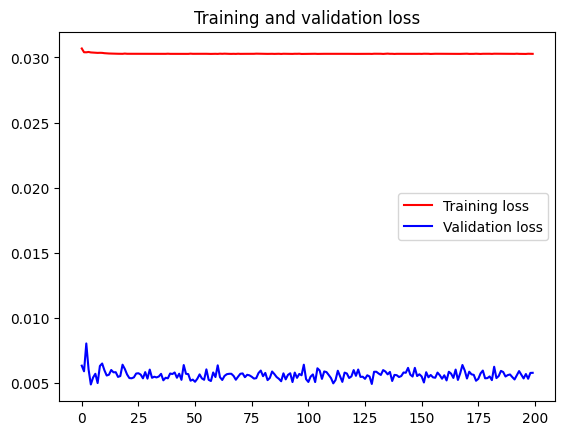

<Figure size 640x480 with 0 Axes>

In [84]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [38]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

218/218 [==============================] - 0s 575us/step


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [40]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  30.828242828085436
Train data MSE:  950.3805558674012
Train data MAE:  15.677729524044132
Test data RMSE:  20.609486978461984
Test data MSE:  424.75095351539414
Test data MAE:  12.629014113910698


In [41]:
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
pdq_combinations = [(p, d, q) for p in p_values for d in d_values for q in q_values]

def evaluate_arima_models(data, pdq_combinations):
    results = []
    for pdq in pdq_combinations:
        try:
            model = ARIMA(data, order=pdq)
            model_fit = model.fit()
            aic = model_fit.aic
            results.append((pdq, aic))
        except:
            continue
    return results

results = evaluate_arima_models(df_train, pdq_combinations)
best_aic = min(results, key=lambda x: x[1])[1]
best_pdq = [result[0] for result in results if result[1] == best_aic][0]


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

In [43]:
print("Best ARIMA parameters:", best_pdq)


Best ARIMA parameters: (2, 1, 1)


In [44]:
model = ARIMA(df_train, order=best_pdq)
model_fit = model.fit()

/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                27860
Model:                 ARIMA(2, 1, 1)   Log Likelihood               46255.914
Date:                Thu, 18 Jan 2024   AIC                         -92503.828
Time:                        19:23:53   BIC                         -92470.888
Sample:                             0   HQIC                        -92493.221
                              - 27860                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0048      0.003    393.956      0.000       1.000       1.010
ar.L2         -0.0859      0.002    -41.219      0.000      -0.090      -0.082
ma.L1         -0.9968      0.000  -2373.747      0.000      -0.998      -0.996
sigma2         0.0021   5.57e-06    379.824      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):           1903445.31
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):              52.11   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        43.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
df_predict = model_fit.predict(start=len(df_train), end=len(df_price)-1)

In [47]:
mean_squared_error(df_test, df_predict)

0.0041113118964498955

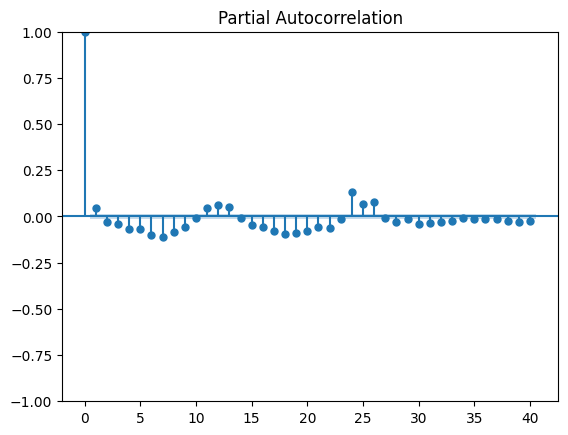

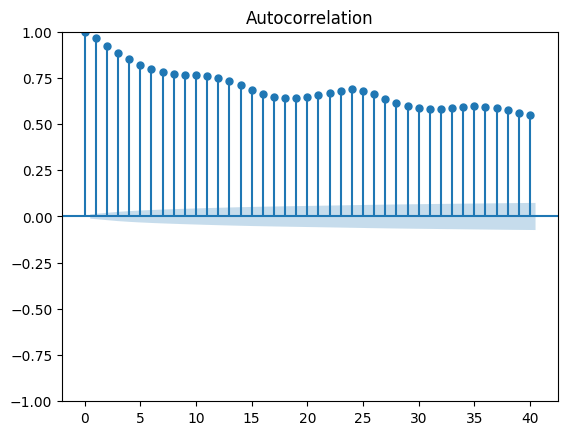

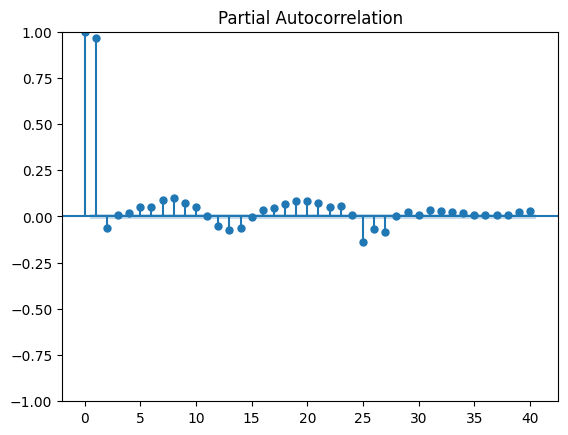

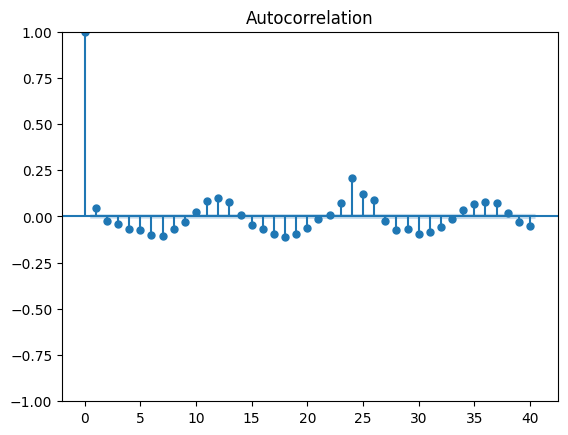

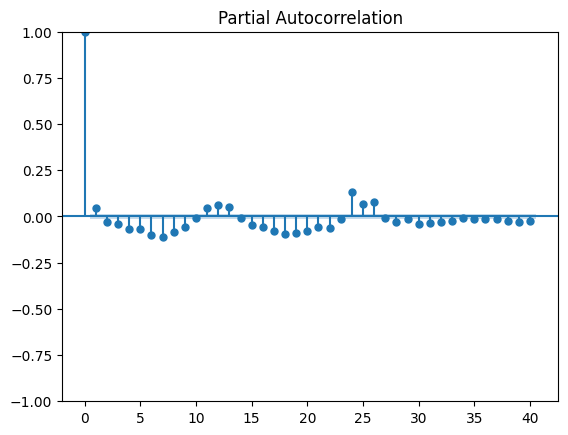

In [48]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_train, lags=40) 
plot_pacf(df_train, lags=40)

series_diff = pd.DataFrame(df_train).diff().dropna() 

plot_acf(series_diff, lags=40)
plot_pacf(series_diff, lags=40)

In [49]:
from statsmodels.tsa.stattools import kpss
potential_m_values = [7, 12, 24]  
best_m = None
best_kpss_stat = float('inf')

for m in potential_m_values:
    series_diff = pd.DataFrame(df_train).diff(m).dropna()

    kpss_result = kpss(series_diff, regression='c')  
    kpss_stat = kpss_result[0]
    p_value = kpss_result[1]

    if kpss_stat < best_kpss_stat and p_value > 0.05:
        best_m = m
        best_kpss_stat = kpss_stat



/var/folders/hg/n24r9jj93w7fwkd71c03mj9h0000gn/T/ipykernel_11155/627328596.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series_diff, regression='c')
/var/folders/hg/n24r9jj93w7fwkd71c03mj9h0000gn/T/ipykernel_11155/627328596.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series_diff, regression='c')
/var/folders/hg/n24r9jj93w7fwkd71c03mj9h0000gn/T/ipykernel_11155/627328596.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series_diff, regression='c')


In [50]:
print("Best m value based on KPSS test:", best_m)

Best m value based on KPSS test: 7


In [36]:
import itertools
import statsmodels.api as sm
import numpy as np


seasonal_order_values = range(3) 

best_aic = np.inf
best_seasonal_order = None

for seasonal_order_candidate in itertools.product(seasonal_order_values, repeat=3):
    p, d, q = (2, 1, 1)
    P, D, Q = seasonal_order_candidate
    m = 7 

    sarima_model = sm.tsa.SARIMAX(df_train, order=(p, d, q), seasonal_order=(P, D, Q, m))
    sarima_result = sarima_model.fit()

    current_aic = sarima_result.aic

    if current_aic < best_aic:
        best_aic = current_aic
        best_seasonal_order = (P, D, Q)

print("Best Seasonal Order:", best_seasonal_order)


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.63893D+00    |proj g|=  8.82726D-02

At iterate    5    f= -1.64025D+00    |proj g|=  1.38714D-02

At iterate   10    f= -1.64026D+00    |proj g|=  1.24336D-01

At iterate   15    f= -1.64033D+00    |proj g|=  6.80936D-03

At iterate   20    f= -1.64033D+00    |proj g|=  5.00790D-02

At iterate   25    f= -1.64159D+00    |proj g|=  1.81736D+00

At iterate   30    f= -1.64553D+00    |proj g|=  4.53924D-01

At iterate   35    f= -1.65257D+00    |proj g|=  2.65215D-01

At iterate   40    f= -1.65821D+00    |proj g|=  1.30821D-02

At iterate   45    f= -1.65886D+00    |proj g|=  4.01159D-02

At iterate   50    f= -1.66030D+00    |proj g|=  4.75782D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64406D+00    |proj g|=  1.30660D-01


 This problem is unconstrained.



At iterate    5    f= -1.64516D+00    |proj g|=  4.66372D-01

At iterate   10    f= -1.64531D+00    |proj g|=  7.60195D-02

At iterate   15    f= -1.64546D+00    |proj g|=  1.13627D-01

At iterate   20    f= -1.64548D+00    |proj g|=  5.16303D-03

At iterate   25    f= -1.64548D+00    |proj g|=  1.15420D-02

At iterate   30    f= -1.64551D+00    |proj g|=  1.27100D-02

At iterate   35    f= -1.65344D+00    |proj g|=  1.22540D+00

At iterate   40    f= -1.65869D+00    |proj g|=  1.09135D-01

At iterate   45    f= -1.66026D+00    |proj g|=  2.73049D-02


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.66195D+00    |proj g|=  1.07096D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     62      1     0     0   1.071D-01  -1.662D+00
  F =  -1.6619494977992670     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64230D+00    |proj g|=  5.53820D-02

At iterate    5    f= -1.64500D+00    |proj g|=  3.54342D-02

At iterate   10    f= -1.64511D+00    |proj g|=  3.39964D-01

At iterate   15    f= -1.64548D+00    |proj g|=  4.74946D-03

At iterate   20    f= -1.64548D+00    |proj g|=  9.54038D-03

At iterate   25    f= -1.64549D+00    |proj g|=  5.32826D-03

At iterate   30    f= -1.64550D+00    |proj g|=  5.30639D-03

At iterate   35    f= -1.64613D+00    |proj g|=  8.76139D-02

At iterate   40    f= -1.65399D+00    |proj g|=  1.10027D-01

At iterate   45    f= -1.65935D+00    |proj g|=  5.37434D-03


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.66051D+00    |proj g|=  3.20079D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   3.201D-01  -1.661D+00
  F =  -1.6605145418808909     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24257D+00    |proj g|=  2.03960D-01


 This problem is unconstrained.



At iterate    5    f= -1.24950D+00    |proj g|=  1.10218D-01

At iterate   10    f= -1.24952D+00    |proj g|=  2.51715D-02

At iterate   15    f= -1.24953D+00    |proj g|=  3.92738D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     22      1     0     0   1.142D-04  -1.250D+00
  F =  -1.2495266188666483     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.48364D+00    |proj g|=  6.75325D+00

At iterate    5    f= -1.57094D+00    |proj g|=  1.17815D+00

At iterate   10    f= -1.61717D+00    |proj g|=  4.40394D-01

At iterate   15    f= -1.63309D+00    |proj g|=  8.35934D-01

At iterate   20    f= -1.63726D+00    |proj g|=  3.11514D-01

At iterate   25    f= -1.63864D+00    |proj g|=  2.78593D-01

At iterate   30    f= -1.64197D+00    |proj g|=  1.27709D+00

At iterate   35    f= -1.65132D+00    |proj g|=  3.83900D-01

At iterate   40    f= -1.65594D+00    |proj g|=  4.55790D-01

At iterate   45    f= -1.65685D+00    |proj g|=  7.30797D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     83      2     0     0   5.209D-03  -1.657D+00
  F =  -1.6568747411146392     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50191D+00    |proj g|=  7.28284D+00

At iterate    5    f= -1.60172D+00    |proj g|=  7.36591D-01

At iterate   10    f= -1.61123D+00    |proj g|=  6.81280D-02

At iterate   15    f= -1.61215D+00    |proj g|=  5.08045D-01

At iterate   20    f= -1.61280D+00    |proj g|=  5.22115D-01

At iterate   25    f= -1.61594D+00    |proj g|=  4.64028D-01

At iterate   30    f= -1.61665D+00    |proj g|=  3.89447D-01

At iterate   35    f= -1.63541D+00    |proj g|=  1.27530D-01

At iterate   40    f= -1.64242D+00    |proj g|=  1.03270D-01

At iterate   45    f= -1.64731D+00    |proj g|=  1.64512D-01


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.65232D+00    |proj g|=  6.53182D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   6.532D-01  -1.652D+00
  F =  -1.6523177940287805     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.76700D-01    |proj g|=  1.76747D-01


 This problem is unconstrained.



At iterate    5    f= -6.87280D-01    |proj g|=  1.01626D-02

At iterate   10    f= -6.87332D-01    |proj g|=  1.29936D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     39      2     0     0   7.057D-04  -6.873D-01
  F = -0.68733188320366922     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.76700D-01    |proj g|=  7.10906D-01

At iterate    5    f= -1.02122D+00    |proj g|=  2.81576D-01

At iterate   10    f= -1.21576D+00    |proj g|=  3.88541D-01

At iterate   15    f= -1.23724D+00    |proj g|=  4.41279D-01

At iterate   20    f= -1.24639D+00    |proj g|=  2.70587D-02

At iterate   25    f= -1.24790D+00    |proj g|=  1.92236D-02

At iterate   30    f= -1.24804D+00    |proj g|=  1.53061D-02

At iterate   35    f= -1.24805D+00    |proj g|=  1.50543D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f= -1.54009D+00    |proj g|=  6.30156D-01

At iterate   10    f= -1.57854D+00    |proj g|=  1.31223D-02

At iterate   15    f= -1.57865D+00    |proj g|=  3.66564D-02

At iterate   20    f= -1.57871D+00    |proj g|=  2.89315D-02

At iterate   25    f= -1.58174D+00    |proj g|=  9.88153D-01

At iterate   30    f= -1.59799D+00    |proj g|=  1.84353D-01

At iterate   35    f= -1.62351D+00    |proj g|=  1.15454D-01

At iterate   40    f= -1.62759D+00    |proj g|=  7.74607D-01

At iterate   45    f= -1.63602D+00    |proj g|=  5.41259D-01


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.63779D+00    |proj g|=  2.80188D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     78      1     0     0   2.802D-01  -1.638D+00
  F =  -1.6377898584214974     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64433D+00    |proj g|=  1.42127D-01

At iterate    5    f= -1.64531D+00    |proj g|=  2.92775D-01

At iterate   10    f= -1.64538D+00    |proj g|=  8.43556D-02

At iterate   15    f= -1.64547D+00    |proj g|=  4.56295D-02

At iterate   20    f= -1.64547D+00    |proj g|=  7.93908D-03

At iterate   25    f= -1.64548D+00    |proj g|=  2.43978D-02

At iterate   30    f= -1.64558D+00    |proj g|=  2.63076D-01

At iterate   35    f= -1.65451D+00    |proj g|=  3.19786D-01

At iterate   40    f= -1.65700D+00    |proj g|=  2.65832D-01

At iterate   45    f= -1.65988D+00    |proj g|=  2.43415D-02


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.66081D+00    |proj g|=  3.18886D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     63      1     0     0   3.189D-01  -1.661D+00
  F =  -1.6608139238215374     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64258D+00    |proj g|=  6.74852D-02


 This problem is unconstrained.



At iterate    5    f= -1.64376D+00    |proj g|=  6.22425D-03

At iterate   10    f= -1.64380D+00    |proj g|=  1.15797D-02

At iterate   15    f= -1.64382D+00    |proj g|=  1.39519D-01

At iterate   20    f= -1.64397D+00    |proj g|=  3.09827D-02

At iterate   25    f= -1.64429D+00    |proj g|=  4.61499D-01

At iterate   30    f= -1.64580D+00    |proj g|=  1.66201D-02

At iterate   35    f= -1.64582D+00    |proj g|=  2.11464D-03

At iterate   40    f= -1.64872D+00    |proj g|=  9.97778D-02

At iterate   45    f= -1.65705D+00    |proj g|=  2.46966D-01


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.65793D+00    |proj g|=  3.55370D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67      1     0     0   3.554D-01  -1.658D+00
  F =  -1.6579315679123923     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64313D+00    |proj g|=  9.07507D-02


 This problem is unconstrained.



At iterate    5    f= -1.64558D+00    |proj g|=  1.74064D-02

At iterate   10    f= -1.64568D+00    |proj g|=  1.54254D-03

At iterate   15    f= -1.64568D+00    |proj g|=  8.37128D-03

At iterate   20    f= -1.64575D+00    |proj g|=  3.42860D-02

At iterate   25    f= -1.64986D+00    |proj g|=  5.52404D-01

At iterate   30    f= -1.65761D+00    |proj g|=  9.39049D-02

At iterate   35    f= -1.66064D+00    |proj g|=  1.89303D-01

At iterate   40    f= -1.66150D+00    |proj g|=  6.43809D-02

At iterate   45    f= -1.66238D+00    |proj g|=  2.96115D-02


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.66255D+00    |proj g|=  4.55314D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   4.553D-02  -1.663D+00
  F =  -1.6625453413499873     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.39588D+00    |proj g|=  4.21995D+00


 This problem is unconstrained.



At iterate    5    f= -1.42432D+00    |proj g|=  1.62629D-01

At iterate   10    f= -1.42442D+00    |proj g|=  5.51031D-02

At iterate   15    f= -1.42442D+00    |proj g|=  3.11227D-03

At iterate   20    f= -1.42442D+00    |proj g|=  1.24635D-03

At iterate   25    f= -1.42443D+00    |proj g|=  1.82112D-02

At iterate   30    f= -1.42669D+00    |proj g|=  9.39459D-01

At iterate   35    f= -1.43095D+00    |proj g|=  3.59720D-02

At iterate   40    f= -1.43272D+00    |proj g|=  2.75226D-01

At iterate   45    f= -1.44864D+00    |proj g|=  1.29559D+00


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.46229D+00    |proj g|=  5.83990D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     64      1     0     0   5.840D-01  -1.462D+00
  F =  -1.4622875052971485     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.46365D+00    |proj g|=  6.17570D+00

At iterate    5    f= -1.52963D+00    |proj g|=  4.44084D-01

At iterate   10    f= -1.55456D+00    |proj g|=  1.62154D+00

At iterate   15    f= -1.62290D+00    |proj g|=  2.28055D+00

At iterate   20    f= -1.62871D+00    |proj g|=  1.69254D-01

At iterate   25    f= -1.63942D+00    |proj g|=  2.39940D-01

At iterate   30    f= -1.64312D+00    |proj g|=  1.44137D-01

At iterate   35    f= -1.64443D+00    |proj g|=  9.82449D-03

At iterate   40    f= -1.64844D+00    |proj g|=  8.71705D-01

At iterate   45    f= -1.65440D+00    |proj g|=  1.51089D-01


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.65835D+00    |proj g|=  8.52710D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58      1     0     0   8.527D-02  -1.658D+00
  F =  -1.6583499664690564     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50139D+00    |proj g|=  7.26744D+00


 This problem is unconstrained.



At iterate    5    f= -1.60015D+00    |proj g|=  3.94304D-01

At iterate   10    f= -1.60469D+00    |proj g|=  3.27561D-01

At iterate   15    f= -1.60517D+00    |proj g|=  5.94525D-01

At iterate   20    f= -1.61660D+00    |proj g|=  2.22935D+00

At iterate   25    f= -1.62481D+00    |proj g|=  4.60008D-01

At iterate   30    f= -1.63434D+00    |proj g|=  8.05609D-01

At iterate   35    f= -1.63879D+00    |proj g|=  1.49755D-02

At iterate   40    f= -1.63929D+00    |proj g|=  1.91744D-02

At iterate   45    f= -1.63939D+00    |proj g|=  8.24518D-03


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.63947D+00    |proj g|=  3.33660D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62      1     0     0   3.337D-02  -1.639D+00
  F =  -1.6394747555179510     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.24230D-01    |proj g|=  3.89385D+00

At iterate    5    f= -1.00876D+00    |proj g|=  6.33867D-02

At iterate   10    f= -1.01056D+00    |proj g|=  3.84409D-01

At iterate   15    f= -1.01089D+00    |proj g|=  1.14851D-02

At iterate   20    f= -1.01091D+00    |proj g|=  3.92131D-03

At iterate   25    f= -1.01092D+00    |proj g|=  6.16535D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     35      1     0     0   

 This problem is unconstrained.



At iterate    5    f= -1.30804D+00    |proj g|=  8.38794D-01

At iterate   10    f= -1.33457D+00    |proj g|=  2.55713D-01

At iterate   15    f= -1.35052D+00    |proj g|=  3.01995D-01

At iterate   20    f= -1.35655D+00    |proj g|=  1.22034D+00

At iterate   25    f= -1.39859D+00    |proj g|=  1.03524D-01

At iterate   30    f= -1.40944D+00    |proj g|=  1.79470D-01

At iterate   35    f= -1.42013D+00    |proj g|=  1.81025D-01

At iterate   40    f= -1.42253D+00    |proj g|=  1.21666D-02

At iterate   45    f= -1.42302D+00    |proj g|=  4.93008D-02


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.43132D+00    |proj g|=  4.11611D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     0     0   4.116D-02  -1.431D+00
  F =  -1.4313203774278707     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.24195D-01    |proj g|=  3.89391D+00


 This problem is unconstrained.



At iterate    5    f= -1.04452D+00    |proj g|=  9.42411D-01

At iterate   10    f= -1.22540D+00    |proj g|=  2.60237D-01

At iterate   15    f= -1.28663D+00    |proj g|=  1.04581D-01

At iterate   20    f= -1.31600D+00    |proj g|=  4.58475D-02

At iterate   25    f= -1.33315D+00    |proj g|=  6.07730D-01

At iterate   30    f= -1.37658D+00    |proj g|=  2.27885D+00

At iterate   35    f= -1.59765D+00    |proj g|=  2.05528D+00

At iterate   40    f= -1.61952D+00    |proj g|=  5.61453D-01

At iterate   45    f= -1.63584D+00    |proj g|=  4.37771D-01


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.64494D+00    |proj g|=  1.01482D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     78      1     0     0   1.015D-01  -1.645D+00
  F =  -1.6449428926844694     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64434D+00    |proj g|=  1.42498D-01


 This problem is unconstrained.



At iterate    5    f= -1.64532D+00    |proj g|=  2.84866D-01

At iterate   10    f= -1.64539D+00    |proj g|=  8.84225D-02

At iterate   15    f= -1.64548D+00    |proj g|=  4.08015D-02

At iterate   20    f= -1.64548D+00    |proj g|=  8.37341D-03

At iterate   25    f= -1.64549D+00    |proj g|=  2.06131D-02

At iterate   30    f= -1.64552D+00    |proj g|=  1.54240D-01

At iterate   35    f= -1.64750D+00    |proj g|=  1.08933D+00

At iterate   40    f= -1.65773D+00    |proj g|=  6.55946D-01

At iterate   45    f= -1.65991D+00    |proj g|=  2.35430D-01


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.66021D+00    |proj g|=  1.52255D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     60      1     0     0   1.523D-02  -1.660D+00
  F =  -1.6602079421915639     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64446D+00    |proj g|=  1.47427D-01


 This problem is unconstrained.



At iterate    5    f= -1.64577D+00    |proj g|=  6.14916D-02

At iterate   10    f= -1.64581D+00    |proj g|=  1.86407D-01

At iterate   15    f= -1.64597D+00    |proj g|=  2.00749D-03

At iterate   20    f= -1.64598D+00    |proj g|=  4.27520D-02

At iterate   25    f= -1.64600D+00    |proj g|=  1.84933D-02

At iterate   30    f= -1.64671D+00    |proj g|=  6.45278D-01

At iterate   35    f= -1.64981D+00    |proj g|=  1.24085D-01

At iterate   40    f= -1.65193D+00    |proj g|=  1.66193D-01

At iterate   45    f= -1.65942D+00    |proj g|=  3.54654D-01


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.66087D+00    |proj g|=  5.53467D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   5.535D-02  -1.661D+00
  F =  -1.6608717934435271     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64378D+00    |proj g|=  1.18660D-01


 This problem is unconstrained.



At iterate    5    f= -1.64535D+00    |proj g|=  2.91415D-01

At iterate   10    f= -1.64547D+00    |proj g|=  2.32033D-01

At iterate   15    f= -1.64571D+00    |proj g|=  2.53912D-02

At iterate   20    f= -1.64572D+00    |proj g|=  3.38774D-02

At iterate   25    f= -1.64573D+00    |proj g|=  9.46091D-03

At iterate   30    f= -1.64581D+00    |proj g|=  2.60217D-02

At iterate   35    f= -1.65408D+00    |proj g|=  9.23217D-01

At iterate   40    f= -1.65604D+00    |proj g|=  1.30285D-01

At iterate   45    f= -1.65949D+00    |proj g|=  1.31491D-01


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.65995D+00    |proj g|=  6.38869D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     0     0   6.389D-03  -1.660D+00
  F =  -1.6599527097396980     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.43896D+00    |proj g|=  5.46324D+00


 This problem is unconstrained.



At iterate    5    f= -1.48767D+00    |proj g|=  8.56893D-02

At iterate   10    f= -1.48932D+00    |proj g|=  8.00289D-02

At iterate   15    f= -1.48938D+00    |proj g|=  4.06313D-02

At iterate   20    f= -1.48941D+00    |proj g|=  4.29846D-03

At iterate   25    f= -1.48948D+00    |proj g|=  1.16292D-02

At iterate   30    f= -1.49063D+00    |proj g|=  5.84588D-02

At iterate   35    f= -1.50106D+00    |proj g|=  1.02670D+00

At iterate   40    f= -1.51788D+00    |proj g|=  3.58398D-01

At iterate   45    f= -1.52358D+00    |proj g|=  8.63759D-03


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.52497D+00    |proj g|=  3.32972D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   3.330D-02  -1.525D+00
  F =  -1.5249744709174804     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.44968D+00    |proj g|=  5.77269D+00

At iterate    5    f= -1.50531D+00    |proj g|=  1.07634D-01

At iterate   10    f= -1.51266D+00    |proj g|=  1.13391D+00

At iterate   15    f= -1.51447D+00    |proj g|=  7.26749D-01

At iterate   20    f= -1.53943D+00    |proj g|=  3.42350D+00

At iterate   25    f= -1.55334D+00    |proj g|=  1.77654D-01

At iterate   30    f= -1.59955D+00    |proj g|=  1.23845D+00

At iterate   35    f= -1.61150D+00    |proj g|=  8.61421D-01

At iterate   40    f= -1.63520D+00    |proj g|=  3.44112D-01

At iterate   45    f= -1.64245D+00    |proj g|=  6.64146D-01


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.64452D+00    |proj g|=  3.41338D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   3.413D-01  -1.645D+00
  F =  -1.6445231170037544     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.49857D+00    |proj g|=  7.18521D+00


 This problem is unconstrained.



At iterate    5    f= -1.59513D+00    |proj g|=  8.24097D-01

At iterate   10    f= -1.60494D+00    |proj g|=  5.25313D-02

At iterate   15    f= -1.60689D+00    |proj g|=  1.37533D+00

At iterate   20    f= -1.61238D+00    |proj g|=  1.09357D-01

At iterate   25    f= -1.61759D+00    |proj g|=  1.19291D+00

At iterate   30    f= -1.63872D+00    |proj g|=  7.47499D-02

At iterate   35    f= -1.64394D+00    |proj g|=  1.52241D-02

At iterate   40    f= -1.64569D+00    |proj g|=  3.94400D-02

At iterate   45    f= -1.64614D+00    |proj g|=  7.57910D-03


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.64883D+00    |proj g|=  4.09990D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     0     0   4.100D-01  -1.649D+00
  F =  -1.6488300577835364     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.99426D-01    |proj g|=  5.13229D+00

At iterate    5    f= -1.17722D+00    |proj g|=  1.29219D-01

At iterate   10    f= -1.17822D+00    |proj g|=  1.36324D-02

At iterate   15    f= -1.17827D+00    |proj g|=  2.66716D-02

At iterate   20    f= -1.17827D+00    |proj g|=  2.59674D-03

At iterate   25    f= -1.17829D+00    |proj g|=  3.18040D-02

At iterate   30    f= -1.17854D+00    |proj g|=  4.84434D-02

At iterate   35    f= -1.18273D+00    |proj g|=  1.21237D-01

At iterate   40    f= -1.19235D+00    |proj g|=  1.57489D-01

At iterate   45    f= -1.19682D+00    |proj g|=  3.18306D-01


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.21651D+00    |proj g|=  2.96448D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66      1     0     0   2.964D-01  -1.217D+00
  F =  -1.2165101946677888     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03006D+00    |proj g|=  5.63612D+00

At iterate    5    f= -1.27230D+00    |proj g|=  1.55458D+00

At iterate   10    f= -1.32852D+00    |proj g|=  1.63912D-01

At iterate   15    f= -1.35203D+00    |proj g|=  2.85318D+00

At iterate   20    f= -1.41271D+00    |proj g|=  9.75823D-01

At iterate   25    f= -1.44072D+00    |proj g|=  6.32235D-01

At iterate   30    f= -1.46769D+00    |proj g|=  1.71830D+00

At iterate   35    f= -1.48260D+00    |proj g|=  2.15553D-01

At iterate   40    f= -1.48698D+00    |proj g|=  7.70341D-02

At iterate   45    f= -1.48780D+00    |proj g|=  1.13504D-02


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.48810D+00    |proj g|=  7.98696D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   7.987D-02  -1.488D+00
  F =  -1.4880951067951163     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.71323D-01    |proj g|=  4.67116D+00


 This problem is unconstrained.



At iterate    5    f= -1.18888D+00    |proj g|=  5.54668D+00

At iterate   10    f= -1.37492D+00    |proj g|=  1.36118D+00

At iterate   15    f= -1.42706D+00    |proj g|=  1.70362D-01

At iterate   20    f= -1.43308D+00    |proj g|=  2.86523D-01

At iterate   25    f= -1.43932D+00    |proj g|=  1.43247D-01

At iterate   30    f= -1.43946D+00    |proj g|=  2.30299D-02

At iterate   35    f= -1.44331D+00    |proj g|=  8.73713D-01

At iterate   40    f= -1.46331D+00    |proj g|=  2.99773D+00

At iterate   45    f= -1.57385D+00    |proj g|=  1.07367D+00


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.62845D+00    |proj g|=  1.11082D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     71      1     0     0   1.111D+00  -1.628D+00
  F =  -1.6284464705891577     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Best Seasonal Order: (1, 0, 2)


In [37]:
sarima_model = sm.tsa.SARIMAX(df_train, order=(2, 1, 1), seasonal_order=(1, 0, 2, 7))
sarima_result = sarima_model.fit()

/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.64313D+00    |proj g|=  9.07507D-02

At iterate    5    f= -1.64558D+00    |proj g|=  1.74064D-02

At iterate   10    f= -1.64568D+00    |proj g|=  1.54254D-03

At iterate   15    f= -1.64568D+00    |proj g|=  8.37128D-03

At iterate   20    f= -1.64575D+00    |proj g|=  3.42860D-02

At iterate   25    f= -1.64986D+00    |proj g|=  5.52404D-01

At iterate   30    f= -1.65761D+00    |proj g|=  9.39049D-02

At iterate   35    f= -1.66064D+00    |proj g|=  1.89303D-01

At iterate   40    f= -1.66150D+00    |proj g|=  6.43809D-02

At iterate   45    f= -1.66238D+00    |proj g|=  2.96115D-02


/Users/utsavacharya/Desktop/Projects/VoltVision/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.66255D+00    |proj g|=  4.55314D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   4.553D-02  -1.663D+00
  F =  -1.6625453413499873     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [38]:
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                27860
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2], 7)   Log Likelihood               46318.513
Date:                                Thu, 18 Jan 2024   AIC                         -92623.026
Time:                                        21:55:32   BIC                         -92565.382
Sample:                                             0   HQIC                        -92604.465
                                              - 27860                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9922      0.003    389.160      0.000       0.987       0.997
ar.L2         -0.0668      0.002    -31.509      0.000      -0.071      -0.063
ma.L1         -0.9969      0.000  -2459.163      0.000      -0.998      -0.996
ar.S.L7       -0.9910      0.002   -568.471      0.000      -0.994      -0.988
ma.S.L7        0.9292      0.004    245.963      0.000       0.922       0.937
ma.S.L14      -0.0662      0.004    -18.849      0.000      -0.073      -0.059
sigma2         0.0021   5.54e-06    379.213      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):           1856155.45
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):              51.80   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
df_predict = sarima_result.predict(start=len(df_train), end=len(df_price)-1)

In [49]:
from sklearn.metrics import mean_squared_error

In [51]:
mean_squared_error(df_test, df_predict)

0.0041105077943358196